In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

65070501037<br>
Paweekorn Soratyathorn

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [75]:
df['Maker_Model']= df['Make']+ " " + df['Model']
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Maker_Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW 1 Series
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW 1 Series


In [76]:
# Select features from original dataset to form a new dataframe
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df1.head()

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [77]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [78]:
df2.shape

(11914,)

In [79]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [80]:
# Create the list of list format of the custom corpus for gensim modeling
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

## Train Word2Vec model (skip-gram)

In [ ]:
# from gensim import models
from gensim.models import Word2Vec

model = Word2Vec(sent, min_count=1, vector_size=300, workers=5, window=10, sg=1, epochs=100)
# model = Word2Vec(sent, min_count=1,size= 300,workers=5, window=10, sg = 1, iter=100)

**vector_size**: The number of dimensions of the embeddings and the default is 100.

**window**: The maximum distance between a target word and words around the target word. The default window is 5.

**min_count**: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

**workers**: The number of partitions during training and the default workers is 3.

**sg**: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [82]:
model.wv['Toyota Camry']

array([ 1.89847127e-01,  9.43725333e-02, -1.47713097e-02, -1.69808552e-01,
        5.77887520e-02, -2.85889149e-01,  1.61211267e-01,  3.48973870e-01,
       -1.10616326e-01, -1.90830275e-01,  3.36761206e-01, -2.67641425e-01,
        1.62417412e-01,  2.80134767e-01, -1.67414680e-01,  1.07456995e-02,
        5.61696529e-01,  2.18805343e-01, -3.01352382e-01,  4.62156534e-02,
       -9.81320664e-02, -4.81127501e-02, -1.21994264e-01,  5.39298594e-01,
       -1.81352422e-01, -2.38792598e-01, -2.69530654e-01,  8.51163715e-02,
       -1.38429105e-01, -3.94460469e-01,  4.93268520e-01,  6.88589141e-02,
       -1.27844617e-01, -7.00070709e-02,  6.75419420e-02, -1.06072284e-01,
        1.95214748e-01, -2.02210665e-01, -2.35644430e-02,  1.23034744e-02,
       -2.37439945e-01, -3.98313701e-02,  1.92362845e-01,  3.07950228e-01,
       -5.90579286e-02,  8.72610211e-02, -5.55382995e-03, -1.51125729e-01,
        2.79862702e-01,  1.11177564e-01,  1.75054312e-01, -3.09244066e-01,
        9.58311483e-02,  

In [83]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.53164524

In [84]:
model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.81829935

In [85]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Mercedes-Benz SL-Class', 0.979009211063385),
 ('Cadillac XLR-V', 0.9761945009231567),
 ('Mercedes-Benz SLC-Class', 0.9536489248275757),
 ('Porsche Boxster', 0.9261844158172607),
 ('Chrysler Prowler', 0.9252148270606995)]

In [86]:
model

In [87]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descending order
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [88]:
# only get the unique Maker_Model
Maker_Model = list(df.Maker_Model.unique())

# Show the most similar Mercedes-Benz SLK-Class by cosine distance
cosine_distance(model,'Mercedes-Benz SLK-Class', Maker_Model, 5)

[('Mercedes-Benz SL-Class', 0.97900915),
 ('Cadillac XLR-V', 0.9761945),
 ('Mercedes-Benz SLC-Class', 0.9536489),
 ('Porsche Boxster', 0.9261844),
 ('Chrysler Prowler', 0.9252148)]

# Activity

1. Use the customer complaint data to estimate the word embedding vectors
2. Find similar words to 'debt', 'collection', 'risk'.
3. Plot the closest word using TSNE of the words in (2).

In [2]:
import re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.manifold import TSNE

### Text prep

In [90]:
complaint = pd.read_pickle('consumer_complaint_dataset.data', compression='gzip')
print(complaint.shape)
complaint.head()

(492255, 2)


,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


In [91]:
# check topic for sampling the test set
for ind, topic in enumerate(complaint['topic'].unique()):
    temp = complaint[ complaint['topic'] == topic ].copy()
    print(f'{ind + 1}. {topic}: {len(temp)}')

1. Debt collection: 106946
2. Credit reporting, credit repair services, or other personal consumer reports: 145090
3. Money transfer, virtual currency, or money service: 7865
4. Mortgage: 61581
5. Student loan: 25083
6. Vehicle loan or lease: 8204
7. Checking or savings account: 19153
8. Credit card or prepaid card: 32144
9. Credit card: 18838
10. Payday loan, title loan, or personal loan: 6404
11. Consumer Loan: 9473
12. Payday loan: 1746
13. Bank account or service: 14885
14. Credit reporting: 31588
15. Other financial service: 292
16. Prepaid card: 1450
17. Money transfers: 1497
18. Virtual currency: 16


In [92]:
df_prep = pd.DataFrame(columns=complaint.columns)

for topic in complaint['topic'].unique():
    temp = complaint[ complaint['topic'] == topic ].copy()
    
    if(len(temp) < 2000):
        df_prep = pd.concat([df_prep, temp])
    else:
        df_prep = pd.concat([df_prep, temp.sample(2000)])
        

df_prep.reset_index(drop=True, inplace=True)
df_prep

,topic,input
0,Debt collection,company reaged account and refuses to ive any ...
1,Debt collection,I worked for XXXX XXXX. They provided me with ...
2,Debt collection,"On XX/XX/2017, I was contacted by Navient, and..."
3,Debt collection,XXXX XXXX XXXX sold a paid debt to NATIONAL CR...
4,Debt collection,I signed up for XXXX in XX/XX/XXXX. \nI decide...
...,...,...
30996,Virtual currency,I received a random notice 3 days ago from a d...
30997,Virtual currency,Money was going to be transferred from XXXX to...
30998,Virtual currency,Signed up with Coinbase.com with a {$75.00} si...
30999,Virtual currency,Signed up with Coinbase.com with a {$75.00} si...


In [93]:
# For each row, combine all the columns into one column
df_prep['clean'] = df_prep['topic'] + ' ' + df_prep['input']
df_prep.head()

,topic,input,clean
0,Debt collection,company reaged account and refuses to ive any ...,Debt collection company reaged account and ref...
1,Debt collection,I worked for XXXX XXXX. They provided me with ...,Debt collection I worked for XXXX XXXX. They p...
2,Debt collection,"On XX/XX/2017, I was contacted by Navient, and...","Debt collection On XX/XX/2017, I was contacted..."
3,Debt collection,XXXX XXXX XXXX sold a paid debt to NATIONAL CR...,Debt collection XXXX XXXX XXXX sold a paid deb...
4,Debt collection,I signed up for XXXX in XX/XX/XXXX. \nI decide...,Debt collection I signed up for XXXX in XX/XX/...


In [101]:
stop_words = stopwords.words('english')
def clean_sentence(df, label):
    for ind, sentence in enumerate(df[label]):
        punctuation_pattern = re.compile(r'[^\w\s]|_')
        text = re.sub(punctuation_pattern, '', sentence)

        text = re.sub('\n', '', text)
        words = text.split(' ')
        words = [word.lower() for word in words if word.lower() not in stop_words]
        
        lemmatizer = WordNetLemmatizer()
        cleaned_text = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])
        cleaned_text = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in cleaned_text.split(' ')])
        
        df.loc[ind, label] = cleaned_text
    

clean_sentence(df_prep, 'clean')

In [102]:
# Create the list of list format of the custom corpus for gensim modeling
word_sent = [list(filter(None, row.split(' '))) for row in df_prep['clean']]      
    
# show the example of list of list format of the custom corpus for gensim modeling
word_sent[:2]

[['debt',
  'collection',
  'company',
  'reaged',
  'account',
  'refuse',
  'ive',
  'informaion',
  'account',
  'original',
  'credit',
  'xxxx',
  'already',
  'remove',
  '7',
  'year',
  'report',
  'guideline'],
 ['debt',
  'collection',
  'work',
  'xxxx',
  'xxxx',
  'provide',
  'train',
  'exchange',
  'service',
  'upon',
  'obtain',
  'cdl',
  'attempt',
  'work',
  'debt',
  'terminate',
  'without',
  'cause']]

### Task
<b>1. estimate word embedding vector</b>

In [103]:
model = Word2Vec(word_sent, min_count=20, vector_size=300, workers=5, window=5, sg=1, epochs=100)

<b>2. Similar words</b>

In [141]:
debt = model.wv.most_similar('debt', topn=10)
debt

[('collection', 0.5907238721847534),
 ('collector', 0.5441964864730835),
 ('creditor', 0.4232364594936371),
 ('agency', 0.4205735921859741),
 ('validation', 0.4144574701786041),
 ('owe', 0.41274285316467285),
 ('collect', 0.4015187621116638),
 ('allege', 0.38492923974990845),
 ('validate', 0.3623393177986145),
 ('judgment', 0.3617490530014038)]

In [142]:
collection = model.wv.most_similar('collection', topn=10)
collection

[('debt', 0.5907238125801086),
 ('agency', 0.48693856596946716),
 ('collector', 0.4720112979412079),
 ('report', 0.43093541264533997),
 ('recovery', 0.3930669128894806),
 ('harass', 0.37964555621147156),
 ('validation', 0.37949371337890625),
 ('creditor', 0.37111836671829224),
 ('collect', 0.3696999251842499),
 ('owe', 0.3458119332790375)]

In [143]:
risk = model.wv.most_similar('risk', topn=10)
risk

[('potentially', 0.3181648850440979),
 ('lead', 0.27651676535606384),
 ('safeguard', 0.2735995352268219),
 ('flag', 0.27344125509262085),
 ('loss', 0.27249422669410706),
 ('undue', 0.2721809148788452),
 ('asset', 0.25973737239837646),
 ('fraud', 0.25823846459388733),
 ('mean', 0.25725996494293213),
 ('alert', 0.2571893036365509)]

<b>3. Plot the closest word</b>

In [170]:
def plot_tsne(text, var):
    words = [text] + [word[0] for word in var]

    vectors = np.array([model.wv[w] for w in words])
    tsne = TSNE(n_components=2, random_state=0, perplexity=5)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(6, 6))
    plt.scatter(vectors_2d[0, 0], vectors_2d[0, 1], color='r')
    plt.scatter(vectors_2d[1:, 0], vectors_2d[1:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.title(f"t-SNE of {text}")

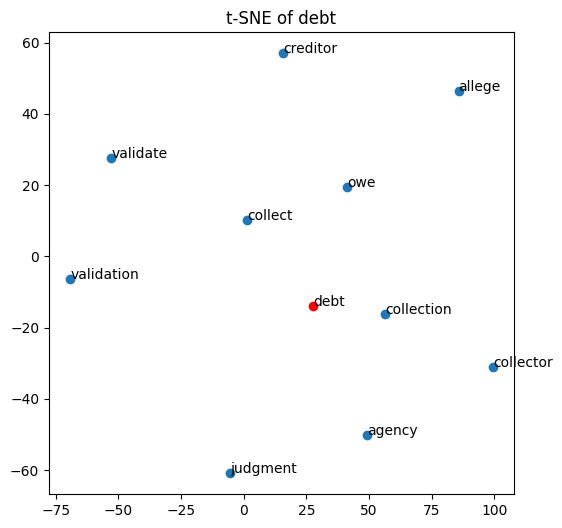

In [171]:
plot_tsne('debt', debt)

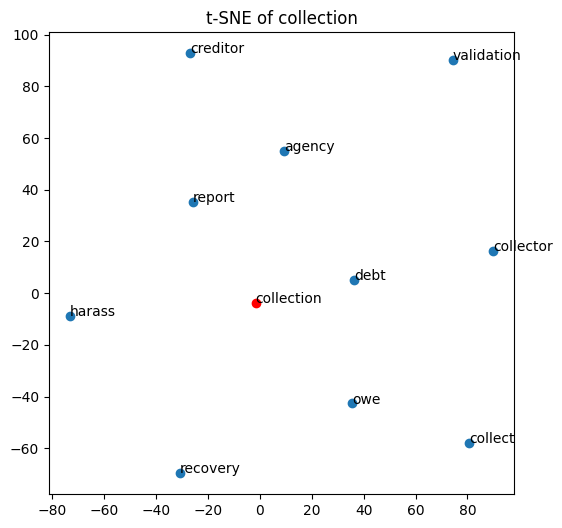

In [172]:
plot_tsne('collection', collection)

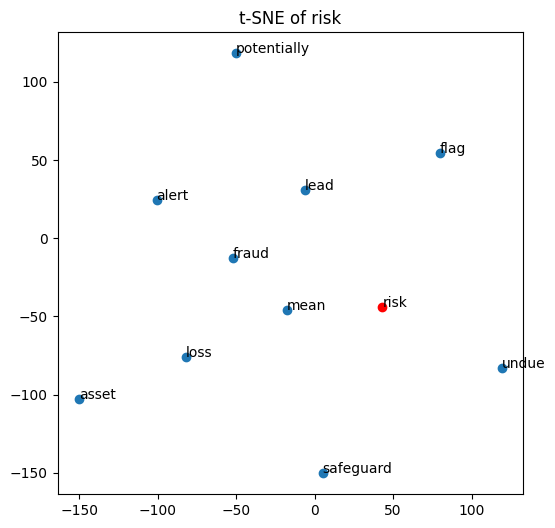

In [173]:
plot_tsne('risk', risk)